In [1]:
# import libraries

import requests
import pandas as pd
import numpy as np
import time

In [2]:
# use FPL API to access FPL data

url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
r = requests.get(url)
json = r.json()
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [3]:
# create dataframes for teams, elements, and element_type data

teams_df = pd.DataFrame(json['teams'])

elements_df = pd.DataFrame(json['elements'])

elements_types_df = pd.DataFrame(json['element_types'])


In [4]:
# inspect each dataframe

In [5]:
teams_df.head()

,code,draw,form,id,loss,name,played,points,position,short_name,...,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,...,None,False,0,1200,1250,1130,1150,1220,1210,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,...,None,False,0,1100,1160,1120,1140,1080,1100,2
2,94,0,None,3,0,Brentford,0,0,0,BRE,...,None,False,0,1010,1020,1020,1030,1020,1030,130
3,36,0,None,4,0,Brighton,0,0,0,BHA,...,None,False,0,1100,1130,1150,1190,1100,1130,131
4,90,0,None,5,0,Burnley,0,0,0,BUR,...,None,False,0,1060,1070,1040,1090,1040,1080,43


In [6]:
elements_df.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,NaN,NaN,80201,0,0,-1,1,0,1,2.3,...,453,48,161,7,NaN,,NaN,,NaN,
1,100.0,100.0,115918,0,0,0,0,0,1,1.0,...,287,13,363,33,NaN,,NaN,,NaN,
2,75.0,50.0,47431,0,0,-2,2,0,3,0.8,...,566,232,570,233,4.0,,2.0,,NaN,
3,100.0,100.0,54694,0,0,-1,1,0,4,1.7,...,144,31,271,34,NaN,,NaN,,1.0,
4,NaN,NaN,58822,0,0,-1,1,0,2,1.0,...,323,121,227,80,NaN,,5.0,,NaN,


In [7]:
elements_types_df

,id,plural_name,plural_name_short,singular_name,singular_name_short,squad_select,squad_min_play,squad_max_play,ui_shirt_specific,sub_positions_locked,element_count
0,1,Goalkeepers,GKP,Goalkeeper,GKP,2,1,1,True,[12],64
1,2,Defenders,DEF,Defender,DEF,5,3,5,False,[],197
2,3,Midfielders,MID,Midfielder,MID,5,2,5,False,[],238
3,4,Forwards,FWD,Forward,FWD,3,1,3,False,[],78


In [8]:
# further inspect columns of elements dataframe

elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [9]:
# filter out irrelevent columns from elements_df

slim_elements_df = elements_df[['id','first_name','second_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','total_points', 'status']]

# change index

slim_elements_df = slim_elements_df.set_index('id')

# change cost

slim_elements_df['now_cost'] = slim_elements_df['now_cost'] / 10

# map position from element_types_df into slim_elements_df

slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)

# map team name from teams_df into slim_elements_df

slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)

# ensure all value info is of type int

slim_elements_df['value_season'] = slim_elements_df.value_season.astype(float)

# add points per 90 minutes

slim_elements_df['ppg'] = (slim_elements_df['total_points'] / slim_elements_df['minutes']) * 90

# remove players with less than 18 games played minutes

slim_elements_df = slim_elements_df.loc[slim_elements_df.minutes > 120]

# add new value metric: points per minute per cost

slim_elements_df['value'] = slim_elements_df['ppg'] / slim_elements_df['now_cost']

In [10]:
# view best value players

slim_elements_df.sort_values(by = 'value', ascending = False).head(10)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,status,position,ppg,value
id,,,,,,,,,,,,,,
245,Konstantinos,Tsimikas,Liverpool,2,26.9,4.2,184,795245,4.3,18,a,Defender,8.804348,2.096273
142,Reece,James,Chelsea,2,9.4,5.6,160,394399,3.6,20,s,Defender,11.250000,2.008929
259,Aymeric,Laporte,Man City,2,3.8,5.5,180,165939,3.6,20,a,Defender,10.000000,1.818182
413,Michail,Antonio,West Ham,4,47.1,7.9,268,1768699,5.1,40,a,Forward,13.432836,1.700359
144,Conor,Gallagher,Crystal Palace,3,0.4,5.5,180,23680,3.3,18,a,Midfielder,9.000000,1.636364
353,Hugo,Lloris,Spurs,1,8.5,5.5,270,283920,4.9,27,a,Goalkeeper,9.000000,1.636364
76,Pontus,Jansson,Brentford,2,2.8,4.5,270,164933,4.9,22,a,Defender,7.333333,1.629630
38,Tyrone,Mings,Aston Villa,2,9.4,5.0,180,237280,3.0,15,d,Defender,7.500000,1.500000
263,Gabriel Fernando,de Jesus,Man City,4,5.8,8.5,170,239334,2.8,24,a,Forward,12.705882,1.494810


In [11]:
# calculate mean value per position

pivot=slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
pivot.sort_values('value',ascending=False)

,position,value
1,Forward,0.731069
2,Goalkeeper,0.672797
0,Defender,0.657466
3,Midfielder,0.624311


In [12]:
# calculate mean value per team

team_pivot = slim_elements_df.pivot_table(index='team',values='value',aggfunc=np.mean).reset_index()
team_pivot.sort_values('value',ascending=False)

,team,value
16,Spurs,1.023568
11,Man City,0.952741
2,Brentford,0.945369
5,Chelsea,0.928061
10,Liverpool,0.889968
7,Everton,0.812530
3,Brighton,0.758938
12,Man Utd,0.728301
18,West Ham,0.720295
1,Aston Villa,0.685935


In [13]:
# create new dataframes for each position

fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
goal_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

<AxesSubplot:>

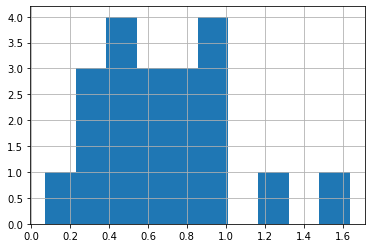

In [14]:
# histogram of goalkeeper values

goal_df.value.hist()

In [15]:
# most valuable goalkeepers

goal_df.sort_values('value',ascending=False).head(10)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,status,position,ppg,value
id,,,,,,,,,,,,,,
353,Hugo,Lloris,Spurs,1,8.5,5.5,270,283920,4.9,27,a,Goalkeeper,9.000000,1.636364
80,David,Raya Martin,Brentford,1,6.4,4.5,270,294276,3.8,17,a,Goalkeeper,5.666667,1.259259
231,Alisson,Ramses Becker,Liverpool,1,7.2,6.0,270,77007,2.8,17,a,Goalkeeper,5.666667,0.944444
143,Edouard,Mendy,Chelsea,1,10.6,6.0,270,88028,2.8,17,a,Goalkeeper,5.666667,0.944444
146,Vicente,Guaita,Crystal Palace,1,5.3,4.5,270,61841,2.7,12,a,Goalkeeper,4.000000,0.888889
200,Kasper,Schmeichel,Leicester,1,19.7,5.0,270,253252,2.6,13,a,Goalkeeper,4.333333,0.866667
270,David,de Gea,Man Utd,1,3.8,5.0,270,86480,2.4,12,a,Goalkeeper,4.000000,0.800000
257,Ederson,Santana de Moraes,Man City,1,10.5,6.0,270,86852,2.3,14,a,Goalkeeper,4.666667,0.777778
69,Robert,Sánchez,Brighton,1,24.0,4.5,270,177634,2.2,10,a,Goalkeeper,3.333333,0.740741


<AxesSubplot:>

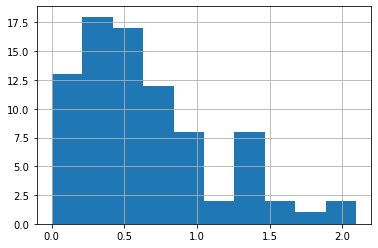

In [16]:
# histogram of defenders

def_df.value.hist()

In [17]:
# most valuable defenders

def_df.sort_values('value',ascending=False).head(10)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,status,position,ppg,value
id,,,,,,,,,,,,,,
245,Konstantinos,Tsimikas,Liverpool,2,26.9,4.2,184,795245,4.3,18,a,Defender,8.804348,2.096273
142,Reece,James,Chelsea,2,9.4,5.6,160,394399,3.6,20,s,Defender,11.250000,2.008929
259,Aymeric,Laporte,Man City,2,3.8,5.5,180,165939,3.6,20,a,Defender,10.000000,1.818182
76,Pontus,Jansson,Brentford,2,2.8,4.5,270,164933,4.9,22,a,Defender,7.333333,1.629630
38,Tyrone,Mings,Aston Villa,2,9.4,5.0,180,237280,3.0,15,d,Defender,7.500000,1.500000
361,Eric,Dier,Spurs,2,5.8,4.6,270,310150,4.3,20,a,Defender,6.666667,1.449275
370,Sergio,Reguilón,Spurs,2,8.6,5.1,270,427035,4.3,22,a,Defender,7.333333,1.437908
367,Davinson,Sánchez,Spurs,2,2.5,4.5,270,136665,4.2,19,a,Defender,6.333333,1.407407
56,Shane,Duffy,Brighton,2,12.7,4.1,270,689949,4.1,17,a,Defender,5.666667,1.382114


<AxesSubplot:>

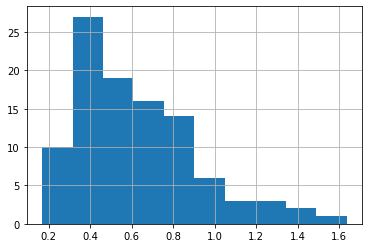

In [18]:
# histogram of midfielders

mid_df.value.hist()

In [19]:
# most valuable midfielders

mid_df.sort_values('value',ascending=False).head(10)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,status,position,ppg,value
id,,,,,,,,,,,,,,
144,Conor,Gallagher,Crystal Palace,3,0.4,5.5,180,23680,3.3,18,a,Midfielder,9.000000,1.636364
74,Alexis,Mac Allister,Brighton,3,0.6,5.5,149,27776,2.4,13,a,Midfielder,7.852349,1.427700
419,Saïd,Benrahma,West Ham,3,28.3,6.4,264,1605660,4.1,26,a,Midfielder,8.863636,1.384943
484,Demarai,Gray,Everton,3,3.2,5.5,244,219547,3.5,19,a,Midfielder,7.008197,1.274218
268,Ferran,Torres,Man City,3,5.4,7.1,240,305276,3.2,23,a,Midfielder,8.625000,1.214789
186,Mateusz,Klich,Leeds,3,0.8,5.5,149,40936,2.0,11,d,Midfielder,6.644295,1.208054
289,Mason,Greenwood,Man Utd,3,14.5,7.6,269,594496,3.4,26,a,Midfielder,8.698885,1.144590
423,Pablo,Fornals,West Ham,3,1.5,6.0,266,85542,3.3,20,a,Midfielder,6.766917,1.127820
240,Diogo,Jota,Liverpool,3,15.3,7.6,187,469672,2.2,17,a,Midfielder,8.181818,1.076555


<AxesSubplot:>

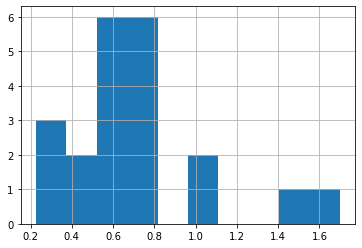

In [20]:
# histogram of forwards

fwd_df.value.hist()

In [21]:
# most valuable forwards

fwd_df.sort_values('value',ascending=False).head(10)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,status,position,ppg,value
id,,,,,,,,,,,,,,
413,Michail,Antonio,West Ham,4,47.1,7.9,268,1768699,5.1,40,a,Forward,13.432836,1.700359
263,Gabriel Fernando,de Jesus,Man City,4,5.8,8.5,170,239334,2.8,24,a,Forward,12.705882,1.494810
450,Emmanuel,Dennis,Watford,4,7.4,5.2,245,578886,2.9,15,a,Forward,5.510204,1.059655
177,Dominic,Calvert-Lewin,Everton,4,16.2,8.2,248,605714,2.8,23,d,Forward,8.346774,1.017899
63,Neal,Maupay,Brighton,4,2.3,6.5,225,93405,2.0,13,a,Forward,5.200000,0.800000
296,Callum,Wilson,Newcastle,4,5.8,7.5,242,100245,2.1,16,d,Forward,5.950413,0.793388
337,Danny,Ings,Aston Villa,4,38.2,8.1,270,566249,2.3,19,a,Forward,6.333333,0.781893
315,Teemu,Pukki,Norwich,4,5.3,5.9,224,79591,1.9,11,a,Forward,4.419643,0.749092
525,Adam,Armstrong,Southampton,4,3.7,6.0,270,242649,2.2,13,a,Forward,4.333333,0.722222


In [22]:
def get_money_team(data = slim_elements_df, budget = 100, num_goal = 2, num_def = 5, num_mid = 5, num_fwd = 3):
    money_team = []
    budget = budget
    positions = {'Goalkeeper':num_goal, 'Defender':num_def, 'Midfielder':num_mid, 'Forward':num_fwd}
    teams = {'Arsenal':3, 'Aston Villa':3, 'Brighton':3, 'Burnley':3, 'Chelsea':3, 
             'Crystal Palace':3, 'Everton':3, 'Leicester':3, 'Leeds':3, 'Liverpool':3, 
             'Man City':3, 'Man Utd':3, 'Newcastle':3, 'Norwich':3, 'Southampton':3, 
             'Spurs':3, 'Watford':3, 'West Ham':3, 'Wolves':3, 'Brentford':3, }
    for idx, player in slim_elements_df.sort_values(by = 'value', ascending = False).iterrows():
        if len(money_team) <= 15 and budget >= player.now_cost and positions[player.position] > 0 and teams[player.team] > 0 and player.status == 'a':    
            money_team.append(player)
            budget -= player.now_cost
            positions[player.position] -= 1
            teams[player.team] -= 1
        else:
            continue      
    
    money_team_df = pd.DataFrame(money_team)
    
    time_start = time.time()
    timeout = 10
    while budget > 0:
        for idx1, player in money_team_df.sort_values(by = 'ppg').iterrows():
            position = player.position
            new_budget = budget + player.now_cost
            for idx2, new_player in slim_elements_df.sort_values(by = 'value', ascending = False).iterrows():
                if new_player.name not in money_team_df.index and new_budget >= new_player.now_cost and new_player.position == player.position and new_player.status == 'a' and (teams[new_player.team] > 0 or new_player.team == player.team) and new_player['ppg'] > player['ppg']:   
                    teams[player.team] += 1
                    money_team_df.drop(pd.DataFrame(money_team_df.loc[player.name]), inplace = True)
                    money_team_df = money_team_df.append(pd.DataFrame(slim_elements_df.loc[new_player.name]).T)
                    budget += player.now_cost
                    budget -= new_player.now_cost
                    teams[new_player.team] -= 1

                    break
                else:
                    continue
        if time.time() > time_start + timeout:
            break
    return money_team_df

In [23]:
def calc_budget(num_def = 5, num_mid = 5, num_fwd = 3):
    
    goal_cost = 4.0
    def_cost = 4.0
    mid_cost = 4.5
    fwd_cost = 4.5
    
    budget = 100 - def_cost*(5-num_def) - mid_cost*(5-num_mid) - fwd_cost*(3-num_fwd) - goal_cost
    return budget

budget_442 = calc_budget(4,4,2)
print(budget_442)

83.0


In [24]:
money_team_2553 = get_money_team(data = slim_elements_df, budget = 100, num_goal = 2, num_def = 5, num_mid = 5, num_fwd = 3)
money_team_541 = get_money_team(data = slim_elements_df, budget = 82.5, num_goal = 1, num_def = 5, num_mid = 4, num_fwd = 1)
money_team_532 = get_money_team(data = slim_elements_df, budget = 82.5, num_goal = 1, num_def = 5, num_mid = 3, num_fwd = 2)
money_team_451 = get_money_team(data = slim_elements_df, budget = 83.0, num_goal = 1, num_def = 4, num_mid = 5, num_fwd = 1)
money_team_442 = get_money_team(data = slim_elements_df, budget = 83.0, num_goal = 1, num_def = 4, num_mid = 4, num_fwd = 2)
money_team_433 = get_money_team(data = slim_elements_df, budget = 83.0, num_goal = 1, num_def = 4, num_mid = 3, num_fwd = 3)
money_team_352 = get_money_team(data = slim_elements_df, budget = 83.5, num_goal = 1, num_def = 3, num_mid = 5, num_fwd = 2)
money_team_343 = get_money_team(data = slim_elements_df, budget = 83.5, num_goal = 1, num_def = 3, num_mid = 4, num_fwd = 3)

In [25]:
print("2553 cost: " + str(sum(money_team_2553['now_cost'])*(11/15)))
print("541 cost: " + str(sum(money_team_541['now_cost'])))
print("532 cost: " + str(sum(money_team_532['now_cost'])))
print("451 cost: " + str(sum(money_team_451['now_cost'])))
print("442 cost: " + str(sum(money_team_442['now_cost'])))
print("433 cost: " + str(sum(money_team_433['now_cost'])))
print("352 cost: " + str(sum(money_team_352['now_cost'])))
print("343 cost: " + str(sum(money_team_343['now_cost'])))

2553 cost: 71.79333333333334
541 cost: 71.7
532 cost: 71.30000000000001
451 cost: 74.80000000000001
442 cost: 75.70000000000002
433 cost: 77.30000000000001
352 cost: 78.20000000000002
343 cost: 81.10000000000002


In [26]:
print("2553 total points: " + str(sum(money_team_2553['total_points'])*(11/15)))
print("541 total points: " + str(sum(money_team_541['total_points'])))
print("532 total points: " + str(sum(money_team_532['total_points'])))
print("451 total points: " + str(sum(money_team_451['total_points'])))
print("442 total points: " + str(sum(money_team_442['total_points'])))
print("433 total points: " + str(sum(money_team_433['total_points'])))
print("352 total points: " + str(sum(money_team_352['total_points'])))
print("343 total points: " + str(sum(money_team_343['total_points'])))

2553 total points: 242.73333333333332
541 total points: 258
532 total points: 270
451 total points: 262
442 total points: 260
433 total points: 267
352 total points: 264
343 total points: 257


In [27]:
print("2553 points per game: " + str(sum(money_team_2553['ppg'])*(11/15)))
print("541 points per game: " + str(sum(money_team_541['ppg'])))
print("532 points per game: " + str(sum(money_team_532['ppg'])))
print("451 points per game: " + str(sum(money_team_451['ppg'])))
print("442 points per game: " + str(sum(money_team_442['ppg'])))
print("433 points per game: " + str(sum(money_team_433['ppg'])))
print("352 points per game: " + str(sum(money_team_352['ppg'])))
print("343 points per game: " + str(sum(money_team_343['ppg'])))

2553 points per game: 96.99172375574685
541 points per game: 100.43126644839592
532 points per game: 104.28468978494367
451 points per game: 101.7968178734269
442 points per game: 105.80381546800376
433 points per game: 103.5282795285334
352 points per game: 107.16936689303475
343 points per game: 105.04740521159351


In [28]:
money_team_2553

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,status,position,ppg,value
245,Konstantinos,Tsimikas,Liverpool,2,26.9,4.2,184,795245,4.3,18,a,Defender,8.80435,2.09627
259,Aymeric,Laporte,Man City,2,3.8,5.5,180,165939,3.6,20,a,Defender,10,1.81818
413,Michail,Antonio,West Ham,4,47.1,7.9,268,1768699,5.1,40,a,Forward,13.4328,1.70036
144,Conor,Gallagher,Crystal Palace,3,0.4,5.5,180,23680,3.3,18,a,Midfielder,9,1.63636
353,Hugo,Lloris,Spurs,1,8.5,5.5,270,283920,4.9,27,a,Goalkeeper,9,1.63636
76,Pontus,Jansson,Brentford,2,2.8,4.5,270,164933,4.9,22,a,Defender,7.33333,1.62963
263,Gabriel Fernando,de Jesus,Man City,4,5.8,8.5,170,239334,2.8,24,a,Forward,12.7059,1.49481
370,Sergio,Reguilón,Spurs,2,8.6,5.1,270,427035,4.3,22,a,Defender,7.33333,1.43791
419,Saïd,Benrahma,West Ham,3,28.3,6.4,264,1605660,4.1,26,a,Midfielder,8.86364,1.38494
80,David,Raya Martin,Brentford,1,6.4,4.5,270,294276,3.8,17,a,Goalkeeper,5.66667,1.25926


In [29]:
money_team_541

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,status,position,ppg,value
245,Konstantinos,Tsimikas,Liverpool,2,26.9,4.2,184,795245,4.3,18,a,Defender,8.80435,2.09627
259,Aymeric,Laporte,Man City,2,3.8,5.5,180,165939,3.6,20,a,Defender,10,1.81818
413,Michail,Antonio,West Ham,4,47.1,7.9,268,1768699,5.1,40,a,Forward,13.4328,1.70036
144,Conor,Gallagher,Crystal Palace,3,0.4,5.5,180,23680,3.3,18,a,Midfielder,9,1.63636
353,Hugo,Lloris,Spurs,1,8.5,5.5,270,283920,4.9,27,a,Goalkeeper,9,1.63636
76,Pontus,Jansson,Brentford,2,2.8,4.5,270,164933,4.9,22,a,Defender,7.33333,1.62963
370,Sergio,Reguilón,Spurs,2,8.6,5.1,270,427035,4.3,22,a,Defender,7.33333,1.43791
122,Marcos,Alonso,Chelsea,2,10.8,5.7,265,554679,4,23,a,Defender,7.81132,1.37041
233,Mohamed,Salah,Liverpool,3,53.3,12.5,270,404846,2.4,30,a,Midfielder,10,0.8
419,Saïd,Benrahma,West Ham,3,28.3,6.4,264,1605660,4.1,26,a,Midfielder,8.86364,1.38494


In [30]:
money_team_532

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,status,position,ppg,value
245,Konstantinos,Tsimikas,Liverpool,2,26.9,4.2,184,795245,4.3,18,a,Defender,8.80435,2.09627
259,Aymeric,Laporte,Man City,2,3.8,5.5,180,165939,3.6,20,a,Defender,10,1.81818
413,Michail,Antonio,West Ham,4,47.1,7.9,268,1768699,5.1,40,a,Forward,13.4328,1.70036
144,Conor,Gallagher,Crystal Palace,3,0.4,5.5,180,23680,3.3,18,a,Midfielder,9,1.63636
353,Hugo,Lloris,Spurs,1,8.5,5.5,270,283920,4.9,27,a,Goalkeeper,9,1.63636
76,Pontus,Jansson,Brentford,2,2.8,4.5,270,164933,4.9,22,a,Defender,7.33333,1.62963
263,Gabriel Fernando,de Jesus,Man City,4,5.8,8.5,170,239334,2.8,24,a,Forward,12.7059,1.49481
370,Sergio,Reguilón,Spurs,2,8.6,5.1,270,427035,4.3,22,a,Defender,7.33333,1.43791
122,Marcos,Alonso,Chelsea,2,10.8,5.7,265,554679,4,23,a,Defender,7.81132,1.37041
233,Mohamed,Salah,Liverpool,3,53.3,12.5,270,404846,2.4,30,a,Midfielder,10,0.8


In [31]:
money_team_451

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,status,position,ppg,value
245,Konstantinos,Tsimikas,Liverpool,2,26.9,4.2,184,795245,4.3,18,a,Defender,8.80435,2.09627
259,Aymeric,Laporte,Man City,2,3.8,5.5,180,165939,3.6,20,a,Defender,10,1.81818
413,Michail,Antonio,West Ham,4,47.1,7.9,268,1768699,5.1,40,a,Forward,13.4328,1.70036
144,Conor,Gallagher,Crystal Palace,3,0.4,5.5,180,23680,3.3,18,a,Midfielder,9,1.63636
353,Hugo,Lloris,Spurs,1,8.5,5.5,270,283920,4.9,27,a,Goalkeeper,9,1.63636
370,Sergio,Reguilón,Spurs,2,8.6,5.1,270,427035,4.3,22,a,Defender,7.33333,1.43791
289,Mason,Greenwood,Man Utd,3,14.5,7.6,269,594496,3.4,26,a,Midfielder,8.69888,1.14459
122,Marcos,Alonso,Chelsea,2,10.8,5.7,265,554679,4,23,a,Defender,7.81132,1.37041
254,Riyad,Mahrez,Man City,3,6.1,8.9,122,120374,1.3,12,a,Midfielder,8.85246,0.994658
233,Mohamed,Salah,Liverpool,3,53.3,12.5,270,404846,2.4,30,a,Midfielder,10,0.8


In [32]:
money_team_442

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,status,position,ppg,value
245,Konstantinos,Tsimikas,Liverpool,2,26.9,4.2,184,795245,4.3,18,a,Defender,8.80435,2.09627
259,Aymeric,Laporte,Man City,2,3.8,5.5,180,165939,3.6,20,a,Defender,10,1.81818
413,Michail,Antonio,West Ham,4,47.1,7.9,268,1768699,5.1,40,a,Forward,13.4328,1.70036
144,Conor,Gallagher,Crystal Palace,3,0.4,5.5,180,23680,3.3,18,a,Midfielder,9,1.63636
353,Hugo,Lloris,Spurs,1,8.5,5.5,270,283920,4.9,27,a,Goalkeeper,9,1.63636
263,Gabriel Fernando,de Jesus,Man City,4,5.8,8.5,170,239334,2.8,24,a,Forward,12.7059,1.49481
370,Sergio,Reguilón,Spurs,2,8.6,5.1,270,427035,4.3,22,a,Defender,7.33333,1.43791
122,Marcos,Alonso,Chelsea,2,10.8,5.7,265,554679,4,23,a,Defender,7.81132,1.37041
233,Mohamed,Salah,Liverpool,3,53.3,12.5,270,404846,2.4,30,a,Midfielder,10,0.8
419,Saïd,Benrahma,West Ham,3,28.3,6.4,264,1605660,4.1,26,a,Midfielder,8.86364,1.38494


In [33]:
money_team_433

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,status,position,ppg,value
245,Konstantinos,Tsimikas,Liverpool,2,26.9,4.2,184,795245,4.3,18,a,Defender,8.80435,2.09627
259,Aymeric,Laporte,Man City,2,3.8,5.5,180,165939,3.6,20,a,Defender,10,1.81818
413,Michail,Antonio,West Ham,4,47.1,7.9,268,1768699,5.1,40,a,Forward,13.4328,1.70036
144,Conor,Gallagher,Crystal Palace,3,0.4,5.5,180,23680,3.3,18,a,Midfielder,9,1.63636
353,Hugo,Lloris,Spurs,1,8.5,5.5,270,283920,4.9,27,a,Goalkeeper,9,1.63636
263,Gabriel Fernando,de Jesus,Man City,4,5.8,8.5,170,239334,2.8,24,a,Forward,12.7059,1.49481
370,Sergio,Reguilón,Spurs,2,8.6,5.1,270,427035,4.3,22,a,Defender,7.33333,1.43791
122,Marcos,Alonso,Chelsea,2,10.8,5.7,265,554679,4,23,a,Defender,7.81132,1.37041
233,Mohamed,Salah,Liverpool,3,53.3,12.5,270,404846,2.4,30,a,Midfielder,10,0.8
205,Jamie,Vardy,Leicester,4,14.6,10.5,260,209610,1.8,19,a,Forward,6.57692,0.626374


In [34]:
money_team_352

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,status,position,ppg,value
245,Konstantinos,Tsimikas,Liverpool,2,26.9,4.2,184,795245,4.3,18,a,Defender,8.80435,2.09627
259,Aymeric,Laporte,Man City,2,3.8,5.5,180,165939,3.6,20,a,Defender,10,1.81818
413,Michail,Antonio,West Ham,4,47.1,7.9,268,1768699,5.1,40,a,Forward,13.4328,1.70036
144,Conor,Gallagher,Crystal Palace,3,0.4,5.5,180,23680,3.3,18,a,Midfielder,9,1.63636
353,Hugo,Lloris,Spurs,1,8.5,5.5,270,283920,4.9,27,a,Goalkeeper,9,1.63636
263,Gabriel Fernando,de Jesus,Man City,4,5.8,8.5,170,239334,2.8,24,a,Forward,12.7059,1.49481
289,Mason,Greenwood,Man Utd,3,14.5,7.6,269,594496,3.4,26,a,Midfielder,8.69888,1.14459
122,Marcos,Alonso,Chelsea,2,10.8,5.7,265,554679,4,23,a,Defender,7.81132,1.37041
254,Riyad,Mahrez,Man City,3,6.1,8.9,122,120374,1.3,12,a,Midfielder,8.85246,0.994658
233,Mohamed,Salah,Liverpool,3,53.3,12.5,270,404846,2.4,30,a,Midfielder,10,0.8


In [35]:
money_team_343

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,status,position,ppg,value
245,Konstantinos,Tsimikas,Liverpool,2,26.9,4.2,184,795245,4.3,18,a,Defender,8.80435,2.09627
259,Aymeric,Laporte,Man City,2,3.8,5.5,180,165939,3.6,20,a,Defender,10,1.81818
413,Michail,Antonio,West Ham,4,47.1,7.9,268,1768699,5.1,40,a,Forward,13.4328,1.70036
144,Conor,Gallagher,Crystal Palace,3,0.4,5.5,180,23680,3.3,18,a,Midfielder,9,1.63636
353,Hugo,Lloris,Spurs,1,8.5,5.5,270,283920,4.9,27,a,Goalkeeper,9,1.63636
263,Gabriel Fernando,de Jesus,Man City,4,5.8,8.5,170,239334,2.8,24,a,Forward,12.7059,1.49481
122,Marcos,Alonso,Chelsea,2,10.8,5.7,265,554679,4,23,a,Defender,7.81132,1.37041
233,Mohamed,Salah,Liverpool,3,53.3,12.5,270,404846,2.4,30,a,Midfielder,10,0.8
205,Jamie,Vardy,Leicester,4,14.6,10.5,260,209610,1.8,19,a,Forward,6.57692,0.626374
419,Saïd,Benrahma,West Ham,3,28.3,6.4,264,1605660,4.1,26,a,Midfielder,8.86364,1.38494
